In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("../data/credit.csv")

In [3]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [5]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [19]:
df_tmp = df.copy()
y = np.where(df_tmp.default == 2, 1, 0)
del df_tmp["default"]
df_dummy = pd.get_dummies(df_tmp, drop_first=True)
X = df_dummy.values.astype(np.float64)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                        test_size = 0.3, random_state = 1)

In [22]:
scaler = StandardScaler()

In [35]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [36]:
X_train_std.shape, X_test_std.shape, y_train.shape, y_test.shape

((700, 48), (300, 48), (700,), (300,))

In [40]:
lr = LogisticRegression()
lr.fit(X_train_std, y_train)
lr.score(X_test_std,y_test)

0.75666666666666671

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
accuracy_score(y_test, lr.predict(X_test_std))

0.75666666666666671

In [47]:
pd.Series(y_test).value_counts()

0    214
1     86
dtype: int64

In [48]:
len(y_test)

300

In [45]:
confusion_matrix(y_test, lr.predict(X_test_std))

array([[188,  26],
       [ 47,  39]])

In [51]:
pd.Series(y_train).value_counts()

0    486
1    214
dtype: int64

In [52]:
486/700 # baseline accuracy

0.6942857142857143

In [63]:
pd.Series(y_test).value_counts()

0    214
1     86
dtype: int64

In [50]:
(188 + 39)/300

0.7566666666666667

In [56]:
pd.DataFrame(lr.predict_proba(X_test_std)).head()

,0,1
0,0.609428,0.390572
1,0.062964,0.937036
2,0.793430,0.206570
3,0.384815,0.615185
4,0.157366,0.842634


In [61]:
y_test_pred = np.where(lr.predict_proba(X_test_std)[:, 1] > 0.4, 1, 0)
print("accuracy: ", accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

accuracy:  0.736666666667


array([[173,  41],
       [ 38,  48]])

In [62]:
y_test_pred = np.where(lr.predict_proba(X_test_std)[:, 1] > 0.6, 1, 0)
print("accuracy: ", accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

accuracy:  0.766666666667


array([[199,  15],
       [ 55,  31]])

In [78]:
from sklearn.metrics import roc_curve

In [82]:
fpr, tpr, thresholds = \
    roc_curve(y_test, lr.predict_proba(X_test_std)[:, 1])

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

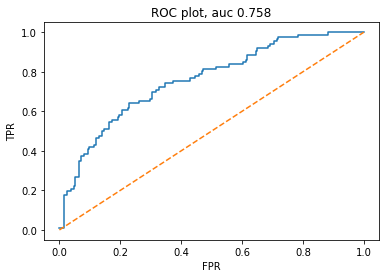

In [96]:
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC plot, auc %.3f" % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], ls = "--")

In [92]:
from sklearn.metrics import auc

Bible.txt                      lena512.bmp
CleanCreditScoring.csv         market-price.csv
Combined_Cycle_Power_Plant.csv ml-latest-small
MNIST                          mobile-sales-data.csv
StocksCluster.csv              mushroom-agaricus-lepiota.data
credit.csv                     smsSpamCollection.arff
creditcard-fraud.csv           snsdata.csv
creditcard-fraud.csv.zip       startups.csv
elantra_sales.csv              stocks.csv
flights.csv                    text_prediction(RNN).tgz
healthy.csv                    time-series
housing.csv                    tumor.csv
imdb-comments.json             vehicles.csv
imdb-comments.json.zip         web_traffic_timeseries
iris.csv                       wine.csv
istanbul-stock.csv             wineQualityInfo.txt
kaggle-house-prices            wineQualityReds.csv
kaggle-stumbleupon             zillow


0.75847641816996303